# SwapCurves Class

### Objetivo: 

???

### Funcionalidades:

* Visualizacao 3D da Curva de Juros
* Obtencao de taxa para vencimento especifico
* Historico da taxa forward entre dois vencimentos especificos
* Visualizacao da Curva para data especifica
* Historico da taxa para vencimento especifico
* Historico da Duration para vencimento especifico

#### Funcionalidades extras, criadas durante o desenvolvimento:

* FinanceHub Holidays
* FlatForward Interpolation

### Funcionalidades Futuras:

* Script para retirada de dados da Bloomberg e analise automatica da curva
* Implementacao de mais calendarios

# SwapCurves Class

### Qual o seu objetivo?

Aumentar o ferramental disponivel para o estudo e a analise de curvas de juros atraves de funcoes simples e objetivas.

### Mas... O que e um classe?

Uma classe e uma generalizacao criada pelo programador. Tal generalizacao define uma serie de atributos, os quais serao definidos quando da inicializacao da classe, e da criacao de um obejto.

Sabendo disso, podemos entender a vantagem de se trabalhar com essas estruturas: sua habilidade de customizacao.

#### Inicializando a classe:

In [45]:
# Pandas e a biblioteca necessaria para ler os dados de nossa planilha
import pandas as pd
# Aqui importamos a nossa classe
from SwapCurve import SwapCurve

In [46]:
# Lemos os dados da tabela de exemplp
data = pd.read_excel("example.xlsx", index_col=0)
# E entao instanciamos nosso objeto
sc = SwapCurve(data, convention='business_days', calendar='br_anbima')

##### Parametros de inicializacao:

* Convencao
  * Nos permite informar ao codigo qual convencao de dias esta sendo utilizada. Hoje o codigo possibilita a escolha entre dias utei e dias corridos, mas a implementacao de outras convencoes e rapida e facil.
* Calendario
  * Para uma analise correta, e necessario levar em consideracao os feriados. Logo, como cada curva possui seu proprio calendario, precisamos informar ao codigo qual calendario ele devera levar em consideracao. Atualmente possuimos suport somente para o calendario da ANBIMA. 

### Funcionalidades

##### Visualizacao 3D

Permite uma visualizacao da superficie da curva de juros. Nao e necessario passar nenhum parametro.

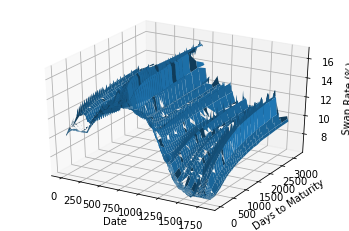

In [8]:
sc.plot_3d()

##### Obtencao de Taxa

Passe uma lista de datas e vencimentos desejados para a funcao, e obtenha as taxas!

Realiza a operacao atraves da interpolacao da curva daquela data. Por isso, aceita um argumento extra (`interpolation_methods`), que define qual/quais metodo(s) de interpolacao serao usados.

In [21]:
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *
import pprint

widget = Dropdown(options=data.columns)
display(widget)

Dropdown(options=(Timestamp('2014-01-10 00:00:00'), Timestamp('2014-01-17 00:00:00'), Timestamp('2014-01-24 00…

In [18]:
widget2 = IntSlider(min=30, max=720)
display(widget2)

IntSlider(value=30, max=720, min=30)

In [22]:
date = widget.value
maturity = widget2.value

rate = sc.get_rate([date], [maturity], ['cubic', 'flat_forward'])
pprint.PrettyPrinter().pprint(rate)

{'cubic':                   499
2014-01-10  11.613888,
 'flat_forward':                   499
2014-01-10  11.633358}


##### Visualizacao da Curva

Plota a curva de juros para uma data especifica.

Tambem permite interpolacao!

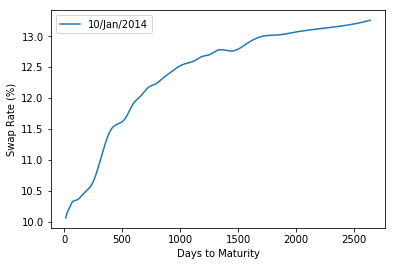

In [30]:
sc.plot_day_curve([date], interpolate=True, interpolate_methods=['cubic'])

##### Historico de um Vencimento

Mostra o historico das taxas de juros para um vencimento especifico.

In [31]:
widget3 = IntSlider(min=30, max=1000)
display(widget3)

IntSlider(value=30, max=1000, min=30)

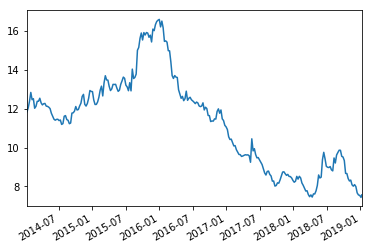

2014-01-10    11.850716
2014-01-17    12.049468
2014-01-24    12.393941
2014-01-31    12.844153
2014-02-07    12.470565
Name: 579, dtype: float64

In [37]:
maturity = widget3.value
rates = sc.get_historic_rates(maturity, plot=True)
rates.head()

##### Historico de uma taxa forward.

O objeto SwapCurves tambem possibilita a obtencao do historico de uma taxa forward entre dois vencimentos especificos! Essa funcao tambem aceita diferentes metodos de interpolacao.

In [40]:
widget4 = IntSlider(min=30, max=1000)
display(widget4)

IntSlider(value=30, max=1000, min=30)

In [41]:
maturity1 = widget4.value
widget5=IntSlider(min=maturity1+1, max=1500)
display(widget5)

IntSlider(value=251, max=1500, min=251)

2014-09-17 00:00:00
2014-01-10 00:00:00
2014-09-24 00:00:00
2014-01-17 00:00:00
2014-10-01 00:00:00
2014-01-24 00:00:00
2014-10-08 00:00:00
2014-01-31 00:00:00
2014-10-15 00:00:00
2014-02-07 00:00:00
2014-10-22 00:00:00
2014-02-14 00:00:00
2014-10-29 00:00:00
2014-02-21 00:00:00
2014-11-05 00:00:00
2014-02-28 00:00:00
2014-11-12 00:00:00
2014-03-07 00:00:00
2014-11-19 00:00:00
2014-03-14 00:00:00
2014-11-26 00:00:00
2014-03-21 00:00:00
2014-12-03 00:00:00
2014-03-28 00:00:00
2014-12-10 00:00:00
2014-04-04 00:00:00
2014-12-17 00:00:00
2014-04-11 00:00:00
2014-12-24 00:00:00
2014-04-18 00:00:00
2014-12-31 00:00:00
2014-04-25 00:00:00
2015-01-07 00:00:00
2014-05-02 00:00:00
2015-01-14 00:00:00
2014-05-09 00:00:00
2015-01-21 00:00:00
2014-05-16 00:00:00
2015-01-28 00:00:00
2014-05-23 00:00:00
2015-02-04 00:00:00
2014-05-30 00:00:00
2015-02-11 00:00:00
2014-06-06 00:00:00
2015-02-18 00:00:00
2014-06-13 00:00:00
2015-02-25 00:00:00
2014-06-20 00:00:00
2015-03-04 00:00:00
2014-06-27 00:00:00


2019-02-06 00:00:00
2018-06-01 00:00:00
2019-02-13 00:00:00
2018-06-08 00:00:00
2019-02-20 00:00:00
2018-06-15 00:00:00
2019-02-27 00:00:00
2018-06-22 00:00:00
2019-03-06 00:00:00
2018-06-29 00:00:00
2019-03-13 00:00:00
2018-07-06 00:00:00
2019-03-20 00:00:00
2018-07-13 00:00:00
2019-03-27 00:00:00
2018-07-20 00:00:00
2019-04-03 00:00:00
2018-07-27 00:00:00
2019-04-10 00:00:00
2018-08-03 00:00:00
2019-04-17 00:00:00
2018-08-10 00:00:00
2019-04-24 00:00:00
2018-08-17 00:00:00
2019-05-01 00:00:00
2018-08-24 00:00:00
2019-05-08 00:00:00
2018-08-31 00:00:00
2019-05-15 00:00:00
2018-09-07 00:00:00
2019-05-22 00:00:00
2018-09-14 00:00:00
2019-05-29 00:00:00
2018-09-21 00:00:00
2019-06-05 00:00:00
2018-09-28 00:00:00
2019-06-12 00:00:00
2018-10-05 00:00:00
2019-06-19 00:00:00
2018-10-12 00:00:00
2019-06-26 00:00:00
2018-10-19 00:00:00
2019-07-03 00:00:00
2018-10-26 00:00:00
2019-07-10 00:00:00
2018-11-02 00:00:00
2019-07-17 00:00:00
2018-11-09 00:00:00
2019-07-24 00:00:00
2018-11-16 00:00:00


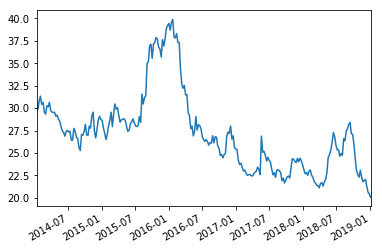

In [47]:
maturity2 = widget5.value
forwards = sc.get_historic_forward(maturity1, maturity2, plot=True, interpolate_method='flat_forward')

##### Historico da Duration

A ultima funcao disponivel e a que nos retorna o historico da duration de um titulo para determinado vencimento.

In [48]:
widget6 = IntSlider(min=30, max=1000)
display(widget6)

IntSlider(value=30, max=1000, min=30)

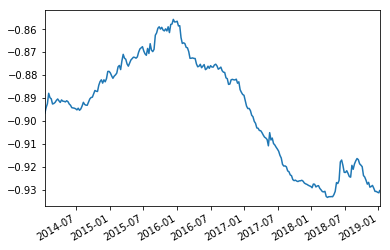

In [49]:
maturity = widget6.value
durations = sc.get_historic_duration(maturity, plot=True)

### Outras funcionalidades desenvolvidas:

Alem do objeto de curvas de juros, tivemos duas outras funcionalidades que acabaram saindo do papel durante o projeto: o calendario ANBIMA e a interpolacao Flat Forward.

* O calendario:

O calendario ANBIMA faz parte de uma nova biblioteca do FinanceHub, uma biblioteca que futuramente contera dados de feriados de diversos calendarios no mundo. Atraves dessa biblioteca sera possivel fazer analises precisas que levem em conta os dias uteis de cada pais/titulo.

* A interpolacao:

A pedido do Gustavo, tornamos possivel a utilizacao do metodo Flat Forward nas interpolacoes do nosso metodo. Como ele tambem nos informou que tal interpolacao era bastante utilizada no mercado local, acabamos por deixa-la como uma nova classe, que pode ser utilizada por outras classes ou outros codigos.

### E agora?

Ainda existe muito a ser desenvolvido para nossa classe, ja que ela pode passar a ser uma generalizacao maior ainda, incluindo curvas que possuam cupons. Alem disso, tambem precisamos aumentar a quantidade de calendarios disponiveis!

Ja para o FinanceHub, acreditamos que o futuro se embasa no desejo de aumentar o uso da biblioteca. Isso passa principalmente pelo desafio de tornar a biblioteca OpenSource, e de distribui-la pelos mais usados metodos de distribuicao no mundo dos desenvolvedores Python (PyPi, Easy-Install e Conda). **NAO SEI MAIS O QUE ESCREVER MEIN, SALVA EU**